In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Data
data = pd.read_excel('../data/Preprocessed_Diabetes_Data.xlsx')
data.head()

,Age,Gender,Gestational_Diabetes,Marital_Status,Family_Income,Education,Occupation,Residence,District,Family_History,High_Blood_Pressure,Physically_Active,Height,Weight_Status,Height_cm,Weight_kg,Risk_Score,Risk_Category
0,50-59 Years,Male,0.0,Married,">50,000BDT",Higher Secondary,Business,Rural,Dhaka,1.0,1.0,1.0,5’5’’ (165cm),189-226 lbs. (86-102kg),165.0,94.0,5,High Risk (≥5)
1,Less than 40 Years,Male,NaN,Unmarried,"20,000-50,000 BDT",Undergraduate,Student,Urban,Noakhali,1.0,0.0,1.0,5’10’’ (178cm),189-226 lbs. (86-102kg),178.0,94.0,2,Low Risk (<5)
2,Less than 40 Years,Female,0.0,Unmarried,"20,000-50,000 BDT",Undergraduate,Unemployed,Urban,Comilla,1.0,0.0,1.0,4’11’’ (150cm),<189 lbs. (86kg),150.0,86.0,1,Low Risk (<5)
3,Less than 40 Years,Female,0.0,Unmarried,"20,000-50,000 BDT",Undergraduate,Lecturer,Rural,Comilla,1.0,0.0,1.0,5’0’’ (152cm),<189 lbs. (86kg),152.0,86.0,1,Low Risk (<5)
4,Less than 40 Years,Male,NaN,Unmarried,">50,000BDT",Undergraduate,Student,Semi-urban,Pabna,0.0,0.0,0.0,5’8’’ (173cm),189-226 lbs. (86-102kg),173.0,94.0,2,Low Risk (<5)


In [7]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5001 non-null   object 
 1   Gender                5001 non-null   object 
 2   Gestational_Diabetes  3569 non-null   float64
 3   Marital_Status        5001 non-null   object 
 4   Family_Income         5001 non-null   object 
 5   Education             5001 non-null   object 
 6   Occupation            4982 non-null   object 
 7   Residence             5001 non-null   object 
 8   District              5001 non-null   object 
 9   Family_History        5001 non-null   float64
 10  High_Blood_Pressure   5001 non-null   float64
 11  Physically_Active     5001 non-null   float64
 12  Height                5001 non-null   object 
 13  Weight_Status         5001 non-null   object 
 14  Height_cm             5001 non-null   float64
 15  Weight_kg            

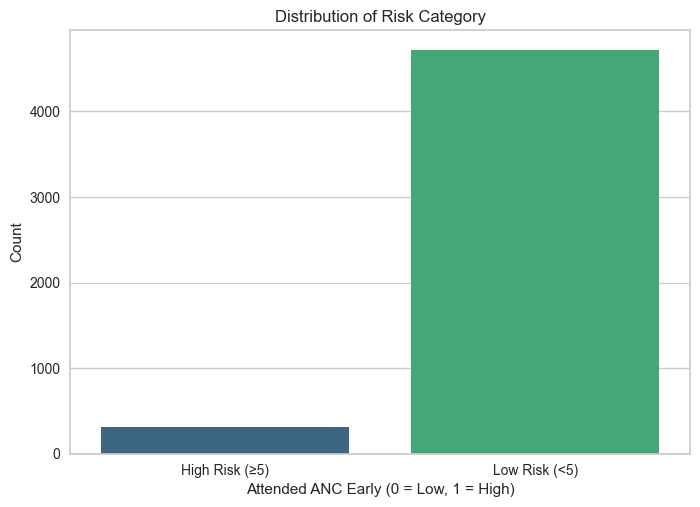

In [8]:
# Visualize the distribution of the 'target' column
sns.countplot(x=data['Risk_Category'], palette="viridis")
plt.title("Distribution of Risk Category")
plt.xlabel("Attended ANC Early (0 = Low, 1 = High)")
plt.ylabel("Count")

# Save the plot as a PDF
plt.savefig('../figures/early_anc_distribution.pdf', format='pdf')
plt.show()

In [9]:
# Drop rows with missing essential features
data = data.dropna(subset=['Height_cm', 'Weight_kg'])

In [10]:
# Encode categorical variables
categorical_cols = ['Age', 'Gender', 'Marital_Status', 'Family_Income', 
                    'Education', 'Occupation', 'Residence', 'District']

for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

In [11]:
# Define features and target
features = ['Age', 'Gender', 'Marital_Status', 'Family_Income', 'Education',
            'Occupation', 'Residence', 'District', 'Gestational_Diabetes',
            'Family_History', 'High_Blood_Pressure', 'Physically_Active',
            'Height_cm', 'Weight_kg']

X = data[features]
y = data['Risk_Category'].map({'Low Risk (<5)': 0, 'High Risk (≥5)': 1})

In [12]:
# Handle missing values with imputation (mean strategy)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

In [13]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

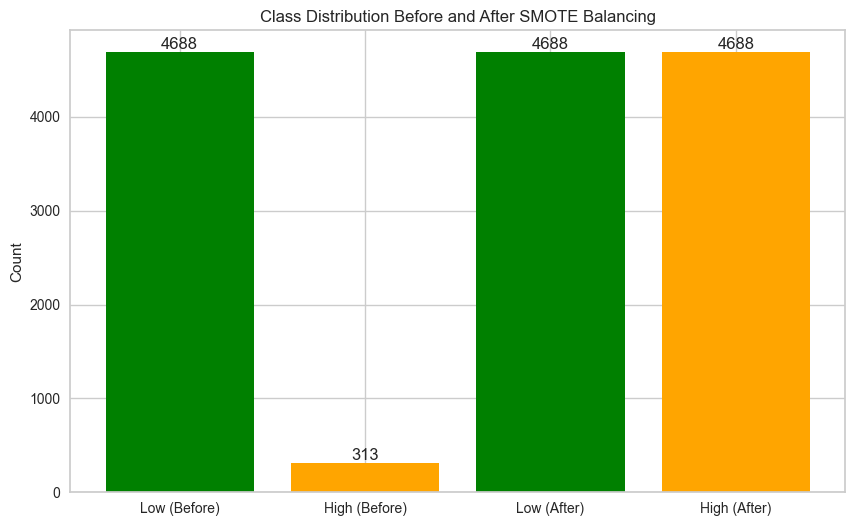

In [14]:
# Combined Visualization Before and After SMOTE
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts_before = y.value_counts()
counts_after = pd.Series(y_smote).value_counts()
bars = ax.bar(['Low (Before)', 'High (Before)', 'Low (After)', 'High (After)'],
              [counts_before[0], counts_before[1], counts_after[0], counts_after[1]],
              color=['green', 'orange', 'green', 'orange'])

# Annotate the bars with counts
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax.set_title('Class Distribution Before and After SMOTE Balancing')
ax.set_ylabel('Count')
plt.savefig("../figures/SMOTE.pdf")
plt.show()

In [15]:
data.columns

Index(['Age', 'Gender', 'Gestational_Diabetes', 'Marital_Status',
       'Family_Income', 'Education', 'Occupation', 'Residence', 'District',
       'Family_History', 'High_Blood_Pressure', 'Physically_Active', 'Height',
       'Weight_Status', 'Height_cm', 'Weight_kg', 'Risk_Score',
       'Risk_Category'],
      dtype='object')

In [16]:
# Combine back into a single DataFrame
data_smote = pd.DataFrame(X_smote, columns=X.columns)
data_smote['Risk_Category'] = y_smote
data_smote.head()

,Age,Gender,Marital_Status,Family_Income,Education,Occupation,Residence,District,Gestational_Diabetes,Family_History,High_Blood_Pressure,Physically_Active,Height_cm,Weight_kg,Risk_Category
0,1.0,1.0,0.0,2.0,1.0,58.0,0.0,13.0,0.000000,1.0,1.0,1.0,165.0,94.0,1
1,3.0,1.0,1.0,0.0,5.0,531.0,2.0,47.0,0.157747,1.0,0.0,1.0,178.0,94.0,0
2,3.0,0.0,1.0,0.0,5.0,584.0,2.0,11.0,0.000000,1.0,0.0,1.0,150.0,86.0,0
3,3.0,0.0,1.0,0.0,5.0,299.0,0.0,11.0,0.000000,1.0,0.0,1.0,152.0,86.0,0
4,3.0,1.0,1.0,2.0,5.0,532.0,1.0,48.0,0.157747,0.0,0.0,0.0,173.0,94.0,0


In [17]:
# export smote data
data_smote.to_excel('../data/Pre_Diabetes_SMOTE.xlsx', index=False)

In [19]:
# import pycaret classification and init setup
from pycaret.classification import *
clf = setup(data = data_smote, target = 'Risk_Category',
          session_id = 123, train_size=0.8)

AttributeError: module 'pycaret' has no attribute 'utils'

In [ ]:
!pip install --upgrade pycaret